In [29]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge

#df = pd.read_csv('ETL_EDA.csv', sep='\t')

df['Daily'] = df.Daily.apply(lambda x: x.strip('$'))
df['%+-YD'] = df['%+-YD'].apply(lambda x: x.strip('%'))
df['%+-LW'] = df['%+-LW'].apply(lambda x: x.strip('%'))
df['Avg'] = df['Avg'].apply(lambda x: x.strip('$'))
df['To Date'] = df['To Date'].apply(lambda x: x.strip('$'))
df['Distributor'] = df.Distributor.apply(lambda x: x[0:-2])


df = df.replace(',','', regex=True)
df = df.replace('-', '0') #SHOUOLD BE NAN
df = df.replace('<0.1', '0')

df['Theatre'] = df['Theatre'].astype(float)
df['Days'] = df['Days'].astype(float)


df['Daily'] = df.Daily.astype(float)
df['%+-YD'] = df['%+-YD'].astype(float)
df['%+-LW'] = df['%+-LW'].astype(float)
df['Avg'] = df['Avg'].astype(float)
df['To Date'] = df['To Date'].astype(float)
df['TD'] = df['TD'].astype(float)
df['YD'] = df['YD'].astype(float)

Alpha 0.5
train RMSE: 135472.11182452668
train R2 0.4103280824216151
test RMSE: 132948.06238578938
test R2 -0.9521523625989654
Alpha 1
train RMSE: 135472.11182452668
train R2 0.41032808241982677
test RMSE: 132948.06238578938
test R2 -0.952149016290565
Alpha 2
train RMSE: 135472.11182452668
train R2 0.4103280824126747
test RMSE: 132948.06238578938
test R2 -0.9521423238452404
Alpha 4
train RMSE: 135472.11182452668
train R2 0.4103280823840735
test RMSE: 132948.06238578938
test R2 -0.9521289396404236
Alpha 8
train RMSE: 135472.11182452668
train R2 0.41032808226972706
test RMSE: 132948.06238578938
test R2 -0.9521021739734306
Alpha 16
train RMSE: 135472.11182452668
train R2 0.41032808181281044
test RMSE: 132948.06238578938
test R2 -0.9520486536045454
Alpha 32
train RMSE: 135472.11182452668
train R2 0.410328079988883
test RMSE: 132948.06238578938
test R2 -0.9519416566835284
Alpha 64
train RMSE: 135472.11182452668
train R2 0.41032807272293836
test RMSE: 132948.06238578938
test R2 -0.9517278377

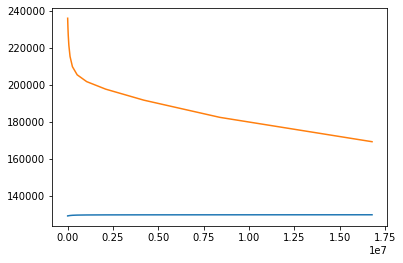

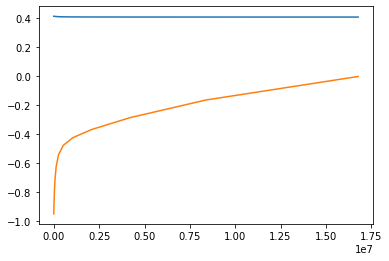

In [206]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
#import matplotlib.plotly as plt


train = df[df['Date'] <= '2020-11-01']
train = train.drop(['Date', 'Release', 'Distributor'],axis=1)
y_train = train['Daily']
X_train = train.drop('Daily', axis = 1)

test = df[df['Date'] > '2020-11-01']
test = test.drop(['Date', 'Release', 'Distributor'],axis=1)
y_test = test['Daily']
X_test = test.drop('Daily', axis=1)

train_rmse_list = []
train_r2_list = []
test_rmse_list = []
test_r2_list = []

alphas = [2**k for k in range(-1,25)]
for alpha in alphas:
    linreg = Ridge(alpha = alpha, fit_intercept=True)
    linreg.fit(X_train, y_train)
    #print('intercept:',linreg.intercept_)
    #print('theta:',linreg.coef_)
    #    
    mean = np.mean(y_train)

    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)

    train_rmse = mean_squared_error(y_train, y_train_pred,squared = False)
    train_r2 = r2_score(y_train,y_train_pred)

    test_rmse = mean_squared_error(y_test, y_test_pred, squared = False)
    test_r2 = r2_score(y_test, y_test_pred)

    print('Alpha', alpha)
    print('train RMSE:',(train_RMSE))
    print('train R2', train_r2)
    print('test RMSE:',(test_RMSE))
    print('test R2', test_r2)
    train_rmse_list.append(train_rmse)
    print
    train_r2_list.append(train_r2)
    test_rmse_list.append(test_rmse)
    test_r2_list.append(test_r2)
plt.plot(alphas, train_rmse_list)
plt.plot(alphas, test_rmse_list)
plt.show()
plt.plot(alphas, train_r2_list)
plt.plot(alphas, test_r2_list)
plt.show()

In [174]:
X_train

,Unnamed: 0,TD,YD,%+-YD,%+-LW,Theatre,Avg,To Date,Days,google trends
553,553,1.0,1.0,-47.8,0.0,2183.0,318.0,3119875.0,3.0,6.031746
554,554,2.0,3.0,3.7,-10.5,2365.0,189.0,11478925.0,24.0,0.845070
555,555,3.0,2.0,-26.8,-33.0,2360.0,164.0,9558341.0,24.0,1.184211
556,556,4.0,4.0,-46.5,-56.1,2051.0,66.0,2285028.0,10.0,1.222222
557,557,5.0,5.0,-42.5,-14.5,1130.0,88.0,4828000.0,31.0,0.000000
...,...,...,...,...,...,...,...,...,...,...
2722,2722,1.0,1.0,-10.7,27.8,21.0,685.0,362609.0,21.0,0.330000
2723,2723,2.0,2.0,-20.5,82.6,9.0,383.0,67510.0,14.0,0.100000
2724,2724,3.0,0.0,0.0,35.7,1.0,19.0,93298.0,98.0,0.952381
2725,2725,1.0,1.0,8.3,14.8,21.0,767.0,348208.0,20.0,0.440000


In [374]:
train_r2_list

[0.9599591142066937,
 0.959959114059722,
 0.9599591134735102,
 0.9599591111419855,
 0.9599591019212236,
 0.9599590658614208,
 0.9599589279110631,
 0.9599584220780311]

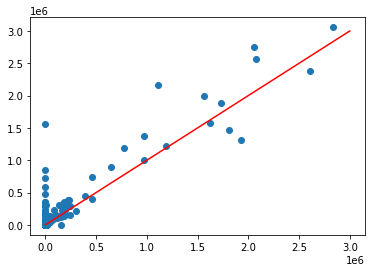

In [19]:
#plt.hist(y_train)
#plt.semilogx()
#plt.show
plt.scatter(y_test, y_test_pred)
plt.plot([0, 3e6], [0,3e6], c='r')
#plt.semilogx()

Alpha 1048576
train RMSE: 3080191.356109454
train R2 0.8367098178232323
test RMSE: 1042219.2235649857
test R2 -4.462536761374136
Alpha 2097152
train RMSE: 3081497.328435964
train R2 0.8365713214488335
test RMSE: 1052258.2544036943
test R2 -4.5682778304493405
Alpha 4194304
train RMSE: 3082258.8854853227
train R2 0.8364905323853227
test RMSE: 1058377.654947051
test R2 -4.633230711192991
Alpha 8388608
train RMSE: 3082681.404968488
train R2 0.8364457011926781
test RMSE: 1062443.447632323
test R2 -4.676594326214302
Alpha 16777216
train RMSE: 3082929.1015869216
train R2 0.8364194166247927
test RMSE: 1065975.3317035348
test R2 -4.714398498704366
Alpha 33554432
train RMSE: 3083141.8344118535
train R2 0.8363968405881189
test RMSE: 1070202.341857086
test R2 -4.75980801508382
Alpha 67108864
train RMSE: 3083505.729533733
train R2 0.8363582190078119
test RMSE: 1076224.0285658916
test R2 -4.824807567461157
Alpha 134217728
train RMSE: 3084418.7509432496
train R2 0.836261296490098
test RMSE: 1085590.0

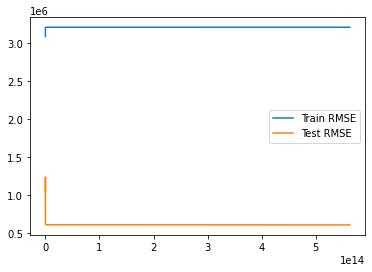

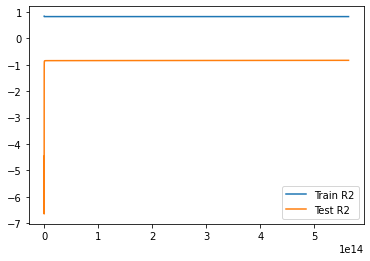

In [153]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


train = df_weekly[df_weekly['Date'] <= '2020-10-15']
train = train.drop(['Date', 'Release', 'Y'],axis=1)
y_train = train['Week + 1']
X_train = train.drop('Week + 1', axis = 1)

test = df_weekly[df_weekly['Date'] > '2020-10-15']
test = test.drop(['Date', 'Release', 'Y'],axis=1)
y_test = test['Week + 1']
X_test = test.drop('Week + 1', axis=1)

train_rmse_list = []
train_r2_list = []
test_rmse_list = []
test_r2_list = []

alphas = [2**k for k in range(20,50)]
for alpha in alphas:
    linreg = Ridge(alpha = alpha, fit_intercept=True)
    linreg.fit(X_train, y_train)
    #print('intercept:',linreg.intercept_)
    #print('theta:',linreg.coef_)
        
    mean = np.mean(y_train)

    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)

    train_rmse = mean_squared_error(y_train, y_train_pred,squared = False)
    train_r2 = r2_score(y_train,y_train_pred)

    test_rmse = mean_squared_error(y_test, y_test_pred, squared = False)
    test_r2 = r2_score(y_test, y_test_pred)

    print('Alpha', alpha)
    print('train RMSE:',(train_rmse))
    print('train R2', train_r2)
    print('test RMSE:',(test_rmse))
    print('test R2', test_r2)
    train_rmse_list.append(train_rmse)

    train_r2_list.append(train_r2)
    test_rmse_list.append(test_rmse)
    test_r2_list.append(test_r2)
plt.plot(alphas, train_rmse_list, label='Train RMSE')
plt.plot(alphas, test_rmse_list, label='Test RMSE')
plt.legend()
plt.show()
plt.plot(alphas, train_r2_list, label='Train R2')
plt.plot(alphas, test_r2_list, label='Test R2')
plt.legend()
plt.show()

intercept: -51409.265268249204
theta: [ 3.61205097e+01  1.40042800e+01  3.17723598e+02  2.88858902e+03
 -1.16387208e+03 -9.06534244e+02  7.10331597e-01  3.61205097e+01
  1.40042800e+01 -4.21638172e+02  7.21288070e+02 -2.13418463e-03]
Alpha 1048576
train RMSE: 3080191.356109454
train R2 0.8367098178232323
test RMSE: 1042219.2235649857
test R2 -4.462536761374136
intercept: -64083.3432125384
theta: [ 3.58652559e+01  1.43070563e+01  3.10366874e+02  1.50710901e+03
 -6.64285304e+02 -5.37605846e+02  7.10283891e-01  3.58652559e+01
  1.43070563e+01 -4.14089258e+02  7.22203673e+02 -2.13329488e-03]
Alpha 2097152
train RMSE: 3081497.328435964
train R2 0.8365713214488335
test RMSE: 1052258.2544036943
test R2 -4.5682778304493405
intercept: -71049.6089404521
theta: [ 3.57231698e+01  1.44928895e+01  3.00545593e+02  7.70964108e+02
 -3.56155996e+02 -2.93449996e+02  7.10241034e-01  3.57231698e+01
  1.44928895e+01 -4.09195837e+02  7.21845615e+02 -2.12917464e-03]
Alpha 4194304
train RMSE: 3082258.885485322

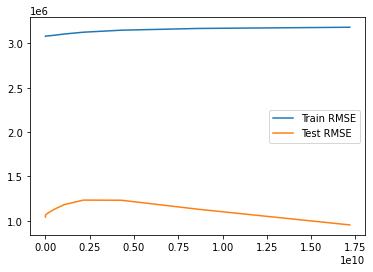

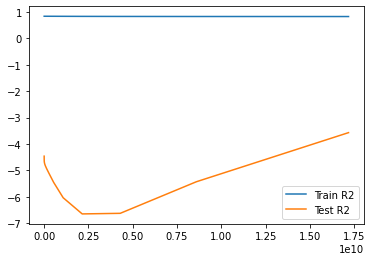

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


train = df_weekly[df_weekly['Date'] <= '2020-10-15']
train = train.drop(['Date', 'Release', 'Y'],axis=1)
y_train = train['Week + 1']
X_train = train.drop('Week + 1', axis = 1)

test = df_weekly[df_weekly['Date'] > '2020-10-15']
test = test.drop(['Date', 'Release', 'Y'],axis=1)
y_test = test['Week + 1']
X_test = test.drop('Week + 1', axis=1)

train_rmse_list = []
train_r2_list = []
test_rmse_list = []
test_r2_list = []

alphas = [2**k for k in range(20,35)]
for alpha in alphas:
    linreg = Ridge(alpha = alpha, fit_intercept=True)
    linreg.fit(X_train, y_train)
    print('intercept:',linreg.intercept_)
    print('theta:',linreg.coef_)
        
    mean = np.mean(y_train)

    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)

    train_rmse = mean_squared_error(y_train, y_train_pred,squared = False)
    train_r2 = r2_score(y_train,y_train_pred)

    test_rmse = mean_squared_error(y_test, y_test_pred, squared = False)
    test_r2 = r2_score(y_test, y_test_pred)

    print('Alpha', alpha)
    print('train RMSE:',(train_rmse))
    print('train R2', train_r2)
    print('test RMSE:',(test_rmse))
    print('test R2', test_r2)
    train_rmse_list.append(train_rmse)

    train_r2_list.append(train_r2)
    test_rmse_list.append(test_rmse)
    test_r2_list.append(test_r2)
plt.plot(alphas, train_rmse_list, label='Train RMSE')
plt.plot(alphas, test_rmse_list, label='Test RMSE')
plt.legend()
plt.show()
plt.plot(alphas, train_r2_list, label='Train R2')
plt.plot(alphas, test_r2_list, label='Test R2')
plt.legend()
plt.show()

In [30]:
#Combines daily into weekly data, divides by 7 where appropriate, removes data points with 'Weekly' == 0
from datetime import datetime
#convert date column into datetime object
df['Date'] = df['Date'].astype('datetime64[ns]')

#convert daily data to weekly
df_weekly = df.groupby("Release").resample('W-Mon', label='left', closed = 'left', on='Date').sum().reset_index().sort_values(by='Date')
df_weekly['Avg TD'] = df_weekly['TD'].apply(lambda x: x/7)
df_weekly = df_weekly.drop('TD', axis=1)
df_weekly['Avg YD'] = df_weekly['YD'].apply(lambda x: x/7)
df_weekly = df_weekly.drop('YD', axis=1)
df_weekly['Weekly'] = df_weekly['Daily']  
df_weekly = df_weekly.drop('Daily', axis=1)
df_weekly['Weekly %+-YD'] = df_weekly['%+-YD'] 
df_weekly['Weekly %+-LW'] = df_weekly['%+-LW'] 
df_weekly['Avg Theatre'] = df_weekly['Theatre'].apply(lambda x: x/7)
df_weekly = df_weekly.drop('Theatre', axis=1)
df_weekly['Avg per Theatre Avg'] = df_weekly['Avg'].apply(lambda x: x/7)
df_weekly = df_weekly.drop('Avg', axis=1)
df_weekly['Avg To Date'] = df_weekly['To Date'].apply(lambda x: x/7)
df_weekly = df_weekly.drop('To Date', axis=1)
df_weekly = df_weekly[df_weekly.Weekly != 0]

In [31]:
#Matches a row with the next weeks 'Weekly' columns which is target variable.  Is there a better way to do this?  
from datetime import timedelta
df_weekly['Y'] = df_weekly['Date'].apply(lambda x: x + timedelta(days=7))
df_weekly['Week + 1'] = pd.Series(np.zeros(df_weekly.shape[0]))
for movie in df_weekly['Release'].unique():
    for date in df_weekly[df_weekly['Release'] == movie]['Date']:
        df_weekly.loc[(df_weekly['Release'] == movie) & (df_weekly['Y'] == date), 'Week + 1'] = float(df_weekly.loc[(df_weekly['Release'] == movie) & (df_weekly['Date'] == date)]['Weekly'])
        df_weekly['Week + 1'].fillna(0, inplace=True)
df_weekly

,Release,Date,Unnamed: 0,%+-YD,%+-LW,Days,google trends,Avg TD,Avg YD,Weekly,Weekly %+-YD,Weekly %+-LW,Avg Theatre,Avg per Theatre Avg,Avg To Date,Y,Week + 1
436,The Trip to Greece,2020-05-18,8153,-38.5,0.0,6.0,1.230000,1.142857,0.714286,1110.0,-38.5,0.0,1.285714,52.714286,344.285714,2020-05-25,513.0
457,The Wretched,2020-05-18,13595,378.3,472.3,110.0,2.380000,0.714286,0.714286,246813.0,378.3,472.3,31.285714,730.857143,319966.714286,2020-05-25,254014.0
140,How to Build a Girl,2020-05-18,13601,-127.1,-32.3,75.0,0.490000,1.571429,1.571429,8929.0,-127.1,-32.3,3.857143,177.857143,48072.000000,2020-05-25,332.0
100,First Lady,2020-05-18,2724,0.0,35.7,98.0,0.952381,0.428571,0.000000,19.0,0.0,35.7,0.142857,2.714286,13328.285714,2020-05-25,0.0
141,How to Build a Girl,2020-05-25,18891,93.0,-659.8,147.0,0.520000,3.428571,3.142857,332.0,93.0,-659.8,3.000000,15.285714,68852.428571,2020-06-01,374.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Elf2020 Re-release,2020-11-16,103,22.5,33.0,27.0,0.000000,4.428571,3.142857,180000.0,22.5,33.0,111.000000,99.142857,125814.857143,2020-11-23,0.0
89,Counter Column,2020-11-16,504,-100.0,-240.5,134.0,0.018782,11.714286,12.857143,25.0,-100.0,-240.5,0.571429,3.571429,8863.000000,2020-11-23,0.0
506,Vanguard,2020-11-16,93,-15.5,0.0,6.0,19.463341,3.000000,2.000000,380428.0,-15.5,0.0,589.285714,39.285714,112981.285714,2020-11-23,0.0
366,The Informer,2020-11-16,591,-58.2,-457.5,98.0,2.263158,13.857143,13.428571,37442.0,-58.2,-457.5,123.000000,53.714286,270363.714286,2020-11-23,0.0


In [32]:
import pandas as pd
#df_weekly = pd.read_csv('1_year_weekly.csv', sep='\t')
#df_weekly['Date'] = df_weekly['Date'].astype('datetime64[ns]')
df_weekly

,Release,Date,Unnamed: 0,%+-YD,%+-LW,Days,google trends,Avg TD,Avg YD,Weekly,Weekly %+-YD,Weekly %+-LW,Avg Theatre,Avg per Theatre Avg,Avg To Date,Y,Week + 1
436,The Trip to Greece,2020-05-18,8153,-38.5,0.0,6.0,1.230000,1.142857,0.714286,1110.0,-38.5,0.0,1.285714,52.714286,344.285714,2020-05-25,513.0
457,The Wretched,2020-05-18,13595,378.3,472.3,110.0,2.380000,0.714286,0.714286,246813.0,378.3,472.3,31.285714,730.857143,319966.714286,2020-05-25,254014.0
140,How to Build a Girl,2020-05-18,13601,-127.1,-32.3,75.0,0.490000,1.571429,1.571429,8929.0,-127.1,-32.3,3.857143,177.857143,48072.000000,2020-05-25,332.0
100,First Lady,2020-05-18,2724,0.0,35.7,98.0,0.952381,0.428571,0.000000,19.0,0.0,35.7,0.142857,2.714286,13328.285714,2020-05-25,0.0
141,How to Build a Girl,2020-05-25,18891,93.0,-659.8,147.0,0.520000,3.428571,3.142857,332.0,93.0,-659.8,3.000000,15.285714,68852.428571,2020-06-01,374.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Elf2020 Re-release,2020-11-16,103,22.5,33.0,27.0,0.000000,4.428571,3.142857,180000.0,22.5,33.0,111.000000,99.142857,125814.857143,2020-11-23,0.0
89,Counter Column,2020-11-16,504,-100.0,-240.5,134.0,0.018782,11.714286,12.857143,25.0,-100.0,-240.5,0.571429,3.571429,8863.000000,2020-11-23,0.0
506,Vanguard,2020-11-16,93,-15.5,0.0,6.0,19.463341,3.000000,2.000000,380428.0,-15.5,0.0,589.285714,39.285714,112981.285714,2020-11-23,0.0
366,The Informer,2020-11-16,591,-58.2,-457.5,98.0,2.263158,13.857143,13.428571,37442.0,-58.2,-457.5,123.000000,53.714286,270363.714286,2020-11-23,0.0


In [41]:
linreg.predict(df_weekly[df_weekly['Release'] == 'The War with Grandpa'].drop(['Date', 'Release', 'Y', 'Week + 1'],axis=1))

array([2.28282793e+12, 2.34332627e+12, 1.66125981e+12, 1.21189276e+12,
       1.36012189e+12, 1.31114150e+12, 8.02521500e+11])

In [168]:
df_weekly[df_weekly['Release'] == 'The War with Grandpa']#.drop(['Date', 'Release', 'Y', 'Week + 1'],axis=1)

,Release,Date,%+-YD,%+-LW,Days,google trends,Avg TD,Avg YD,Weekly,Weekly %+-YD,Weekly %+-LW,Avg Theatre,Avg per Theatre Avg,Avg To Date,Y,Week + 1
1259,The War with Grandpa,2020-10-05,3.1,0.0,6.0,0.87,0.428571,0.285714,3623880.0,3.1,0.0,964.285714,229.714286,1.055914e+06,2020-10-12,3636975.0
1283,The War with Grandpa,2020-10-12,153.4,-94.3,49.0,0.61,1.428571,1.285714,3636975.0,153.4,-94.3,2254.285714,229.714286,5.296109e+06,2020-10-19,2489361.0
1326,The War with Grandpa,2020-10-19,263.1,-249.9,98.0,0.56,2.142857,2.142857,2489361.0,263.1,-249.9,2296.428571,152.571429,8.271362e+06,2020-10-26,1728709.0
1397,The War with Grandpa,2020-10-26,207.5,-170.3,147.0,0.64,2.285714,2.285714,1728709.0,207.5,-170.3,2353.571429,104.285714,1.046319e+07,2020-11-02,1930168.0
1431,The War with Grandpa,2020-11-02,269.2,26.4,196.0,0.68,3.000000,2.857143,1930168.0,269.2,26.4,2357.714286,116.714286,1.224764e+07,2020-11-09,1814182.0
1468,The War with Grandpa,2020-11-09,324.9,53.1,245.0,0.52,3.142857,3.142857,1814182.0,324.9,53.1,2261.000000,117.571429,1.416323e+07,2020-11-16,973453.0
1487,The War with Grandpa,2020-11-16,249.1,-313.6,294.0,0.51,3.285714,3.428571,973453.0,249.1,-313.6,1949.142857,77.857143,1.561724e+07,2020-11-23,1009656.0
1517,The War with Grandpa,2020-11-23,51.0,312.8,343.0,0.35,2.714286,2.571429,1009656.0,51.0,312.8,1607.428571,91.285714,1.668921e+07,2020-11-30,98917.0
1539,The War with Grandpa,2020-11-30,-72.7,-296.3,218.0,0.00,2.428571,2.142857,98917.0,-72.7,-296.3,857.142857,9.142857,9.868440e+06,2020-12-07,0.0


In [61]:
df_weekly = pd.read_csv('2_mo_weekly.csv', sep='\t')
df_weekly['Date'] = df_weekly['Date'].astype('datetime64[ns]')
df_test = df_weekly[df_weekly['Week + 1'] > 0]
df_test = df_weekly[df_weekly['google trends'] > 0]
df_test.corr()

,%+-YD,%+-LW,Days,google trends,Avg TD,Avg YD,Weekly,Weekly %+-YD,Weekly %+-LW,Avg Theatre,Avg per Theatre Avg,Avg To Date,Week + 1
%+-YD,1.000000,0.481804,0.020052,-0.037328,0.085871,0.114901,-0.015551,1.000000,0.481804,-0.038185,0.028413,-0.026120,-0.002255
%+-LW,0.481804,1.000000,0.007515,-0.039458,-0.043867,-0.020849,-0.013722,0.481804,1.000000,-0.052779,0.069749,-0.029419,-0.019257
Days,0.020052,0.007515,1.000000,-0.062891,0.091052,0.092370,-0.102369,0.020052,0.007515,-0.062133,0.034336,0.857764,-0.129571
google trends,-0.037328,-0.039458,-0.062891,1.000000,-0.189805,-0.190640,0.112193,-0.037328,-0.039458,0.149721,-0.006897,0.025782,0.128975
Avg TD,0.085871,-0.043867,0.091052,-0.189805,1.000000,0.990380,-0.404143,0.085871,-0.043867,-0.596186,-0.022912,-0.236419,-0.445910
Avg YD,0.114901,-0.020849,0.092370,-0.190640,0.990380,1.000000,-0.387279,0.114901,-0.020849,-0.573236,-0.019957,-0.239672,-0.427355
Weekly,-0.015551,-0.013722,-0.102369,0.112193,-0.404143,-0.387279,1.000000,-0.015551,-0.013722,0.552786,0.343356,0.068236,0.869312
Weekly %+-YD,1.000000,0.481804,0.020052,-0.037328,0.085871,0.114901,-0.015551,1.000000,0.481804,-0.038185,0.028413,-0.026120,-0.002255
Weekly %+-LW,0.481804,1.000000,0.007515,-0.039458,-0.043867,-0.020849,-0.013722,0.481804,1.000000,-0.052779,0.069749,-0.029419,-0.019257
Avg Theatre,-0.038185,-0.052779,-0.062133,0.149721,-0.596186,-0.573236,0.552786,-0.038185,-0.052779,1.000000,0.088869,0.208166,0.596382


0   2020-10-05
Name: Date, dtype: datetime64[ns]


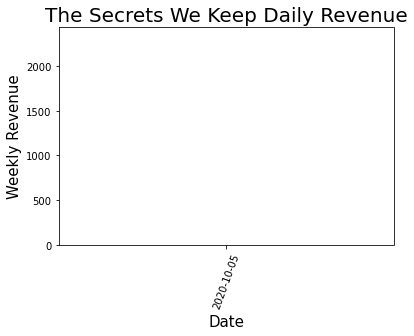

176   2020-11-02
120   2020-10-26
87    2020-10-19
39    2020-10-12
1     2020-10-05
Name: Date, dtype: datetime64[ns]


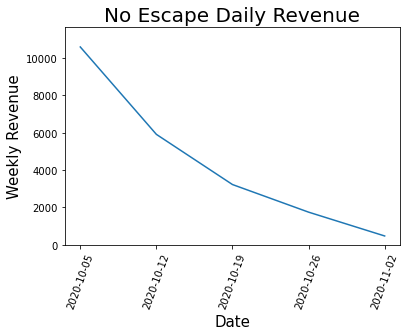

169   2020-11-02
134   2020-10-26
100   2020-10-19
67    2020-10-12
2     2020-10-05
Name: Date, dtype: datetime64[ns]


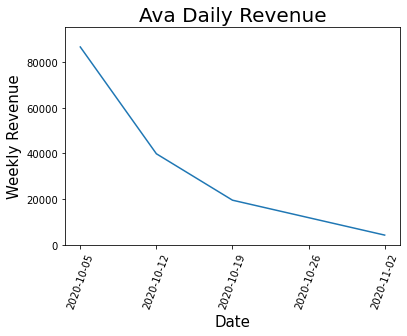

53   2020-10-12
3    2020-10-05
Name: Date, dtype: datetime64[ns]


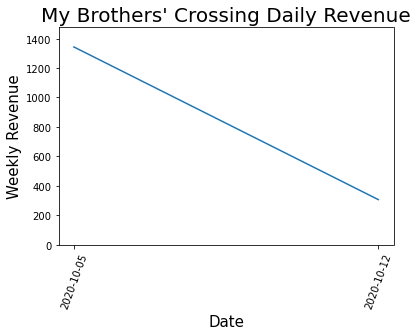

192   2020-11-09
174   2020-11-02
122   2020-10-26
112   2020-10-19
62    2020-10-12
4     2020-10-05
Name: Date, dtype: datetime64[ns]


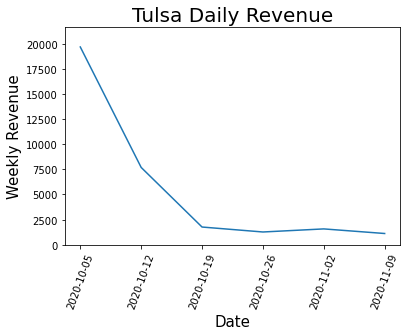

79   2020-10-19
66   2020-10-12
5    2020-10-05
Name: Date, dtype: datetime64[ns]


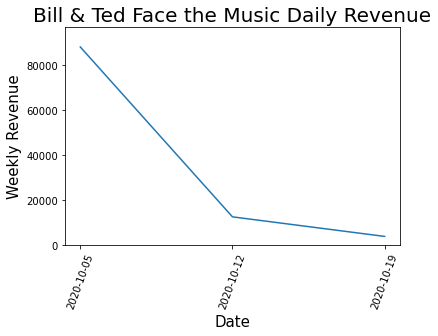

311   2020-11-30
278   2020-11-23
251   2020-11-16
187   2020-11-09
175   2020-11-02
143   2020-10-26
77    2020-10-19
56    2020-10-12
6     2020-10-05
Name: Date, dtype: datetime64[ns]


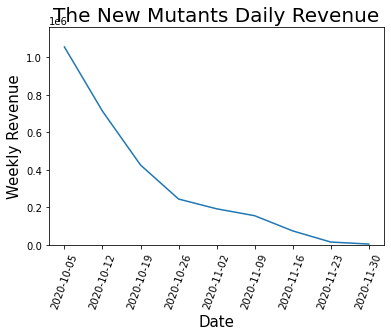

193   2020-11-09
173   2020-11-02
115   2020-10-26
78    2020-10-19
64    2020-10-12
7     2020-10-05
Name: Date, dtype: datetime64[ns]


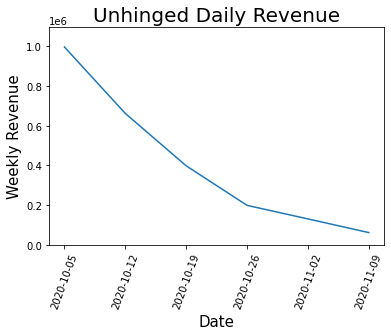

76   2020-10-19
55   2020-10-12
8    2020-10-05
Name: Date, dtype: datetime64[ns]


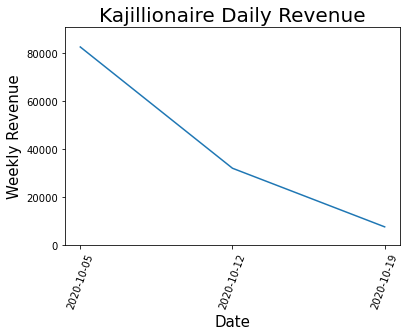

177   2020-11-02
121   2020-10-26
88    2020-10-19
49    2020-10-12
9     2020-10-05
Name: Date, dtype: datetime64[ns]


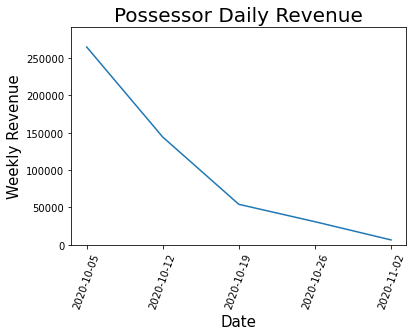

258   2020-11-23
242   2020-11-16
206   2020-11-09
183   2020-11-02
137   2020-10-26
89    2020-10-19
51    2020-10-12
10    2020-10-05
Name: Date, dtype: datetime64[ns]


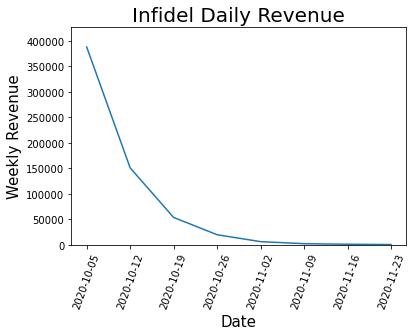

71   2020-10-12
11   2020-10-05
Name: Date, dtype: datetime64[ns]


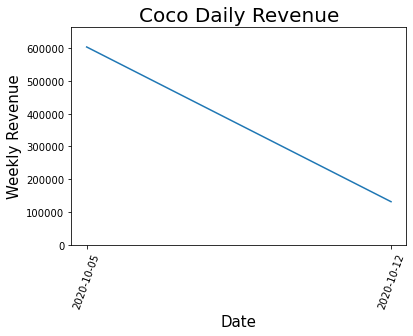

196   2020-11-09
165   2020-11-02
124   2020-10-26
105   2020-10-19
41    2020-10-12
12    2020-10-05
Name: Date, dtype: datetime64[ns]


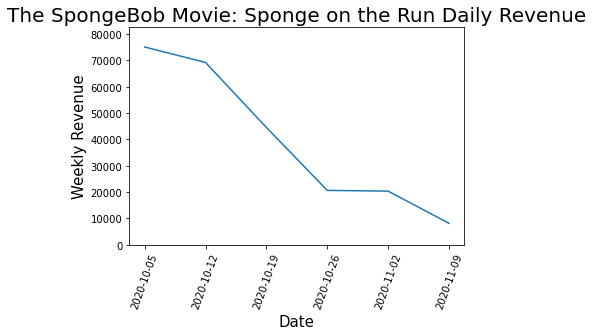

144   2020-10-26
110   2020-10-19
45    2020-10-12
13    2020-10-05
Name: Date, dtype: datetime64[ns]


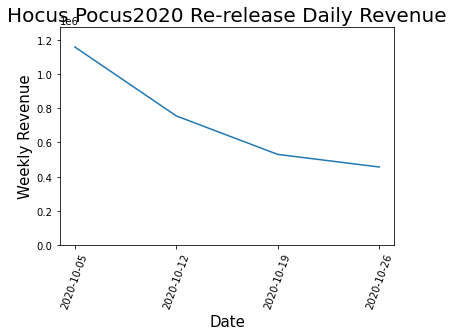

103   2020-10-19
43    2020-10-12
14    2020-10-05
Name: Date, dtype: datetime64[ns]


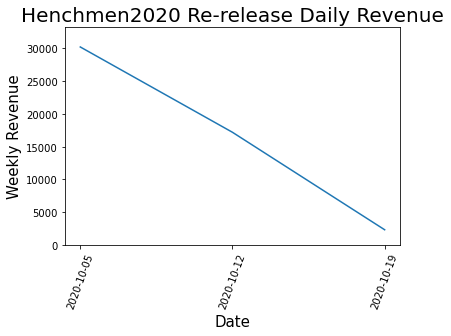

221   2020-11-09
172   2020-11-02
117   2020-10-26
111   2020-10-19
40    2020-10-12
15    2020-10-05
Name: Date, dtype: datetime64[ns]


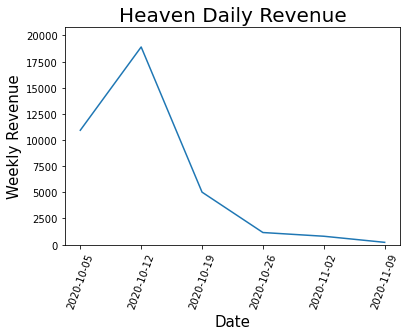

306   2020-11-30
282   2020-11-23
227   2020-11-16
195   2020-11-09
156   2020-11-02
146   2020-10-26
113   2020-10-19
37    2020-10-12
16    2020-10-05
Name: Date, dtype: datetime64[ns]


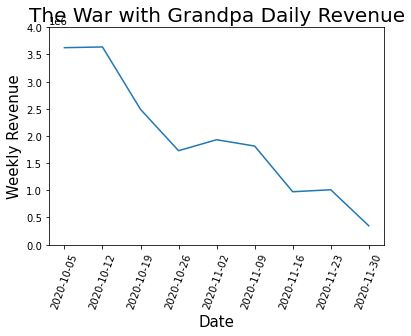

17   2020-10-05
Name: Date, dtype: datetime64[ns]


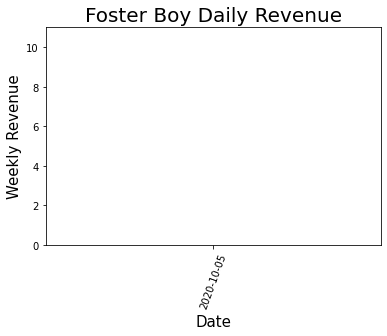

132   2020-10-26
114   2020-10-19
34    2020-10-12
18    2020-10-05
Name: Date, dtype: datetime64[ns]


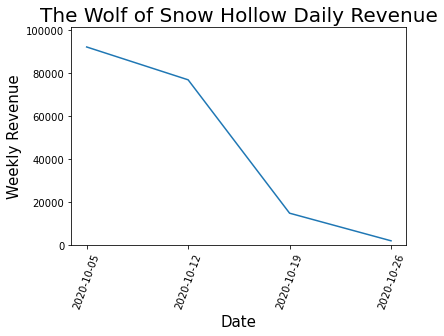

106   2020-10-19
48    2020-10-12
19    2020-10-05
Name: Date, dtype: datetime64[ns]


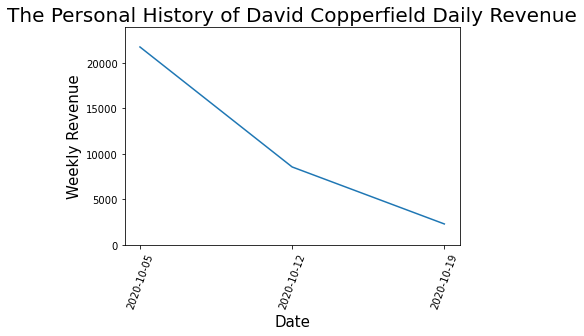

269   2020-11-23
239   2020-11-16
197   2020-11-09
184   2020-11-02
126   2020-10-26
90    2020-10-19
70    2020-10-12
20    2020-10-05
Name: Date, dtype: datetime64[ns]


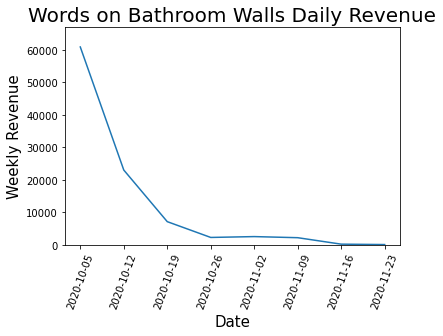

109   2020-10-19
33    2020-10-12
21    2020-10-05
Name: Date, dtype: datetime64[ns]


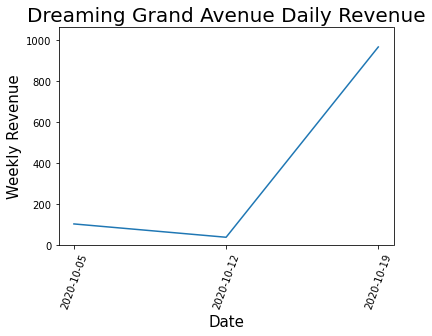

259   2020-11-23
243   2020-11-16
203   2020-11-09
178   2020-11-02
125   2020-10-26
91    2020-10-19
36    2020-10-12
22    2020-10-05
Name: Date, dtype: datetime64[ns]


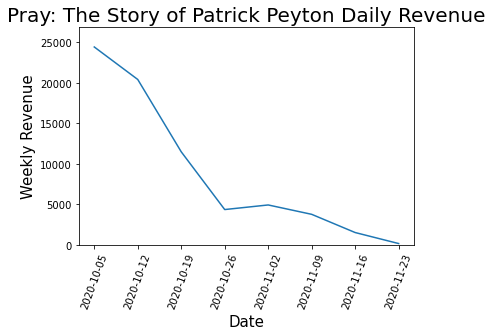

271   2020-11-23
252   2020-11-16
218   2020-11-09
163   2020-11-02
139   2020-10-26
74    2020-10-19
35    2020-10-12
23    2020-10-05
Name: Date, dtype: datetime64[ns]


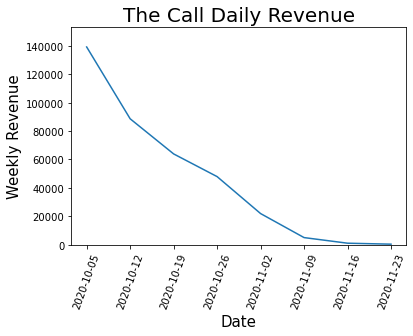

254   2020-11-16
210   2020-11-09
157   2020-11-02
151   2020-10-26
80    2020-10-19
38    2020-10-12
24    2020-10-05
Name: Date, dtype: datetime64[ns]


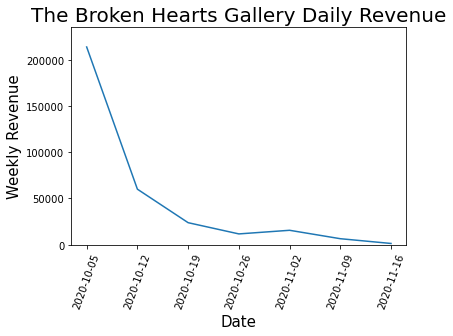

200   2020-11-09
180   2020-11-02
150   2020-10-26
81    2020-10-19
72    2020-10-12
25    2020-10-05
Name: Date, dtype: datetime64[ns]


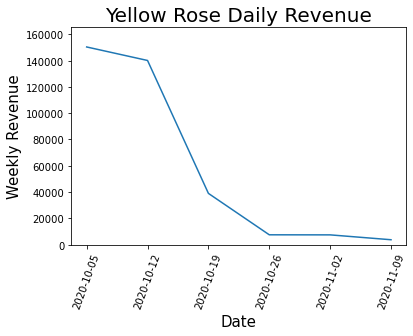

238   2020-11-16
217   2020-11-09
170   2020-11-02
129   2020-10-26
97    2020-10-19
69    2020-10-12
26    2020-10-05
Name: Date, dtype: datetime64[ns]


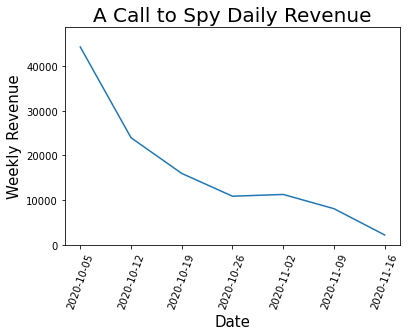

98   2020-10-19
50   2020-10-12
27   2020-10-05
Name: Date, dtype: datetime64[ns]


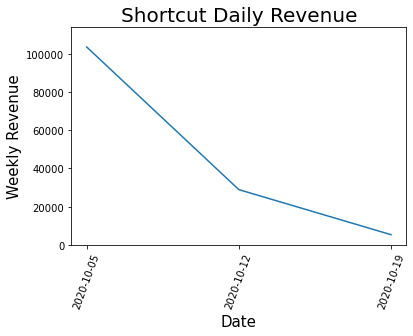

166   2020-11-02
142   2020-10-26
95    2020-10-19
57    2020-10-12
28    2020-10-05
Name: Date, dtype: datetime64[ns]


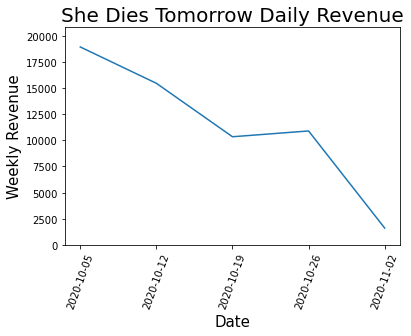

44   2020-10-12
29   2020-10-05
Name: Date, dtype: datetime64[ns]


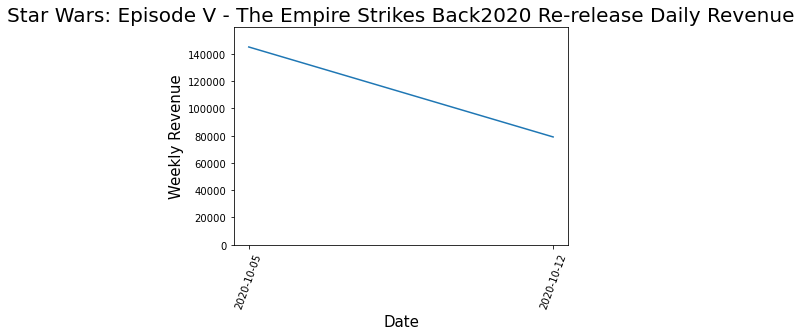

93   2020-10-19
32   2020-10-12
30   2020-10-05
Name: Date, dtype: datetime64[ns]


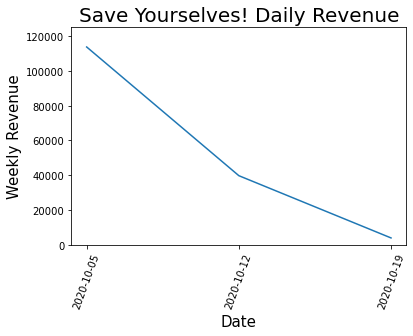

246   2020-11-16
198   2020-11-09
168   2020-11-02
152   2020-10-26
86    2020-10-19
47    2020-10-12
31    2020-10-05
Name: Date, dtype: datetime64[ns]


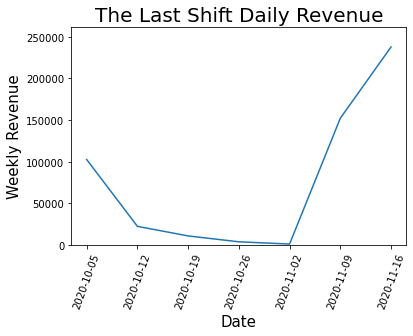

194   2020-11-09
158   2020-11-02
116   2020-10-26
85    2020-10-19
42    2020-10-12
Name: Date, dtype: datetime64[ns]


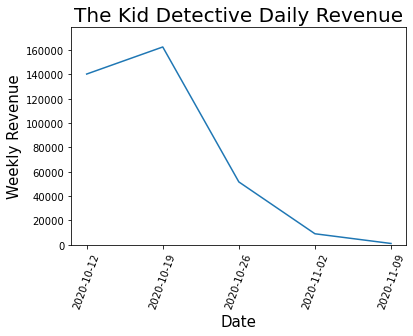

292   2020-11-30
283   2020-11-23
225   2020-11-16
215   2020-11-09
179   2020-11-02
140   2020-10-26
107   2020-10-19
46    2020-10-12
Name: Date, dtype: datetime64[ns]


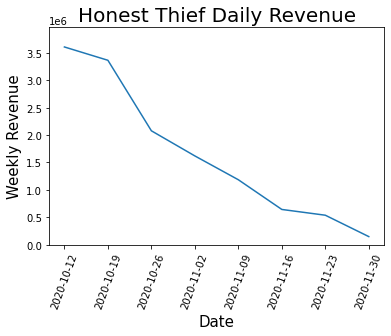

138   2020-10-26
73    2020-10-19
52    2020-10-12
Name: Date, dtype: datetime64[ns]


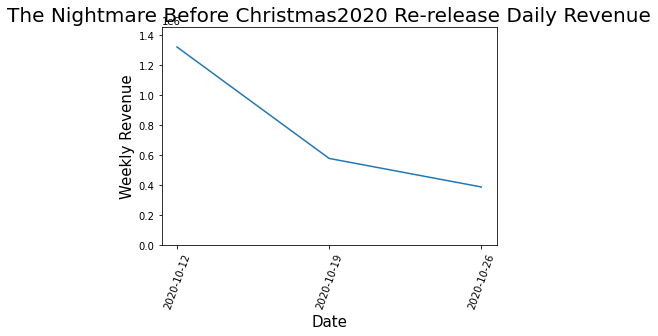

130   2020-10-26
96    2020-10-19
54    2020-10-12
Name: Date, dtype: datetime64[ns]


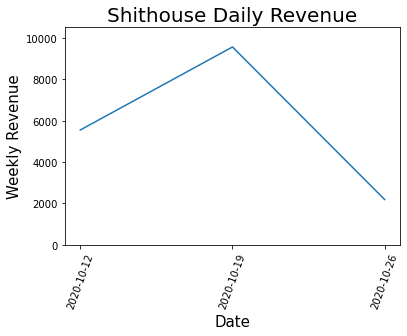

244   2020-11-16
222   2020-11-09
167   2020-11-02
148   2020-10-26
82    2020-10-19
58    2020-10-12
Name: Date, dtype: datetime64[ns]


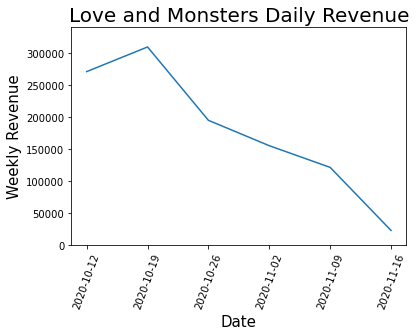

83   2020-10-19
59   2020-10-12
Name: Date, dtype: datetime64[ns]


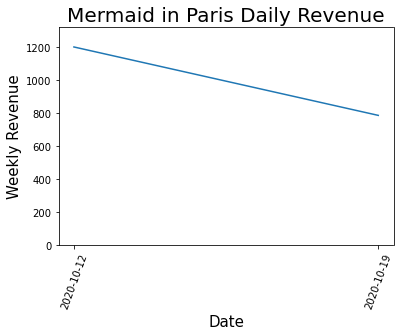

149   2020-10-26
101   2020-10-19
60    2020-10-12
Name: Date, dtype: datetime64[ns]


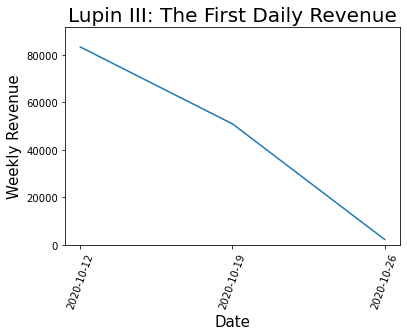

293   2020-11-30
270   2020-11-23
240   2020-11-16
220   2020-11-09
159   2020-11-02
145   2020-10-26
75    2020-10-19
61    2020-10-12
Name: Date, dtype: datetime64[ns]


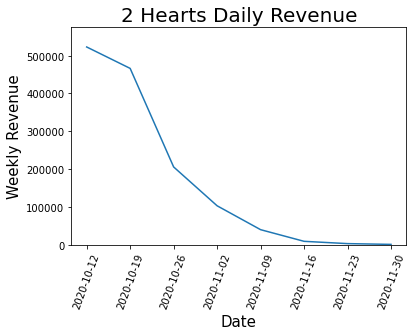

212   2020-11-09
135   2020-10-26
63    2020-10-12
Name: Date, dtype: datetime64[ns]


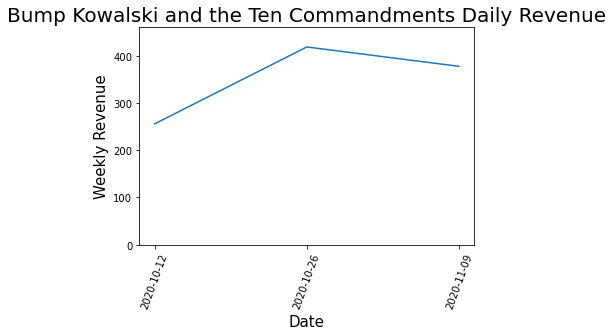

199   2020-11-09
182   2020-11-02
141   2020-10-26
108   2020-10-19
65    2020-10-12
Name: Date, dtype: datetime64[ns]


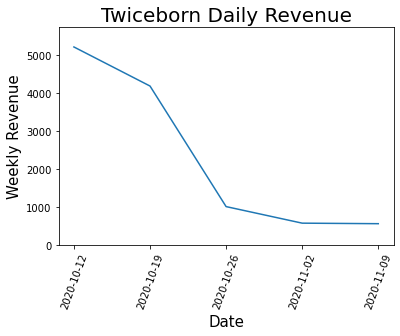

231   2020-11-16
201   2020-11-09
160   2020-11-02
119   2020-10-26
104   2020-10-19
68    2020-10-12
Name: Date, dtype: datetime64[ns]


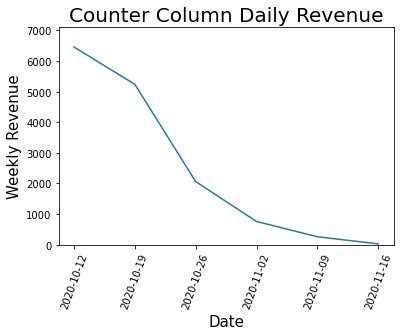

123   2020-10-26
84    2020-10-19
Name: Date, dtype: datetime64[ns]


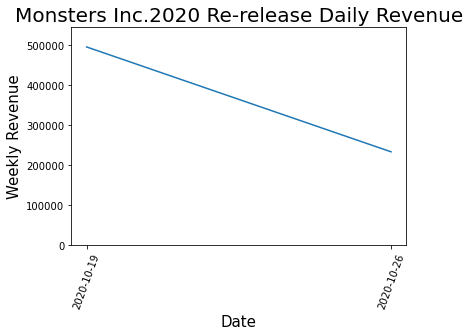

267   2020-11-23
237   2020-11-16
216   2020-11-09
181   2020-11-02
128   2020-10-26
92    2020-10-19
Name: Date, dtype: datetime64[ns]


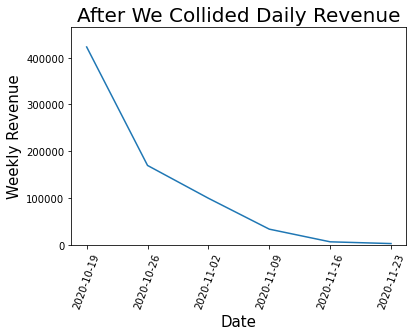

118   2020-10-26
94    2020-10-19
Name: Date, dtype: datetime64[ns]


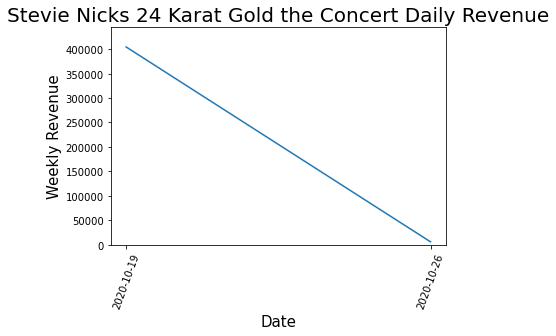

207   2020-11-09
154   2020-11-02
133   2020-10-26
99    2020-10-19
Name: Date, dtype: datetime64[ns]


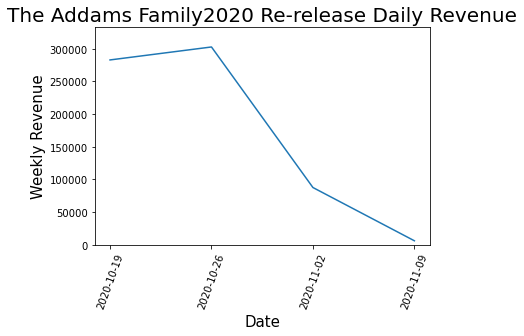

290   2020-11-30
268   2020-11-23
249   2020-11-16
188   2020-11-09
153   2020-11-02
136   2020-10-26
102   2020-10-19
Name: Date, dtype: datetime64[ns]


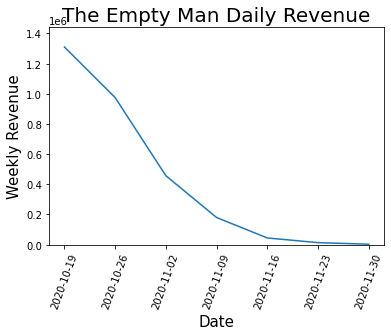

253   2020-11-16
204   2020-11-09
164   2020-11-02
127   2020-10-26
Name: Date, dtype: datetime64[ns]


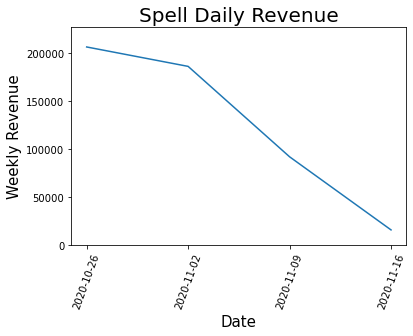

131   2020-10-26
Name: Date, dtype: datetime64[ns]


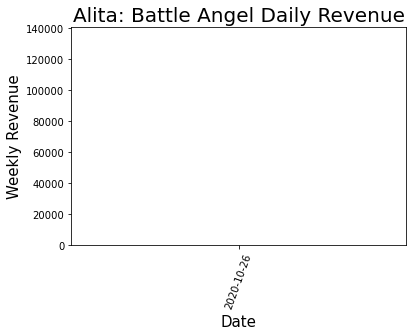

307   2020-11-30
256   2020-11-23
232   2020-11-16
208   2020-11-09
171   2020-11-02
147   2020-10-26
Name: Date, dtype: datetime64[ns]


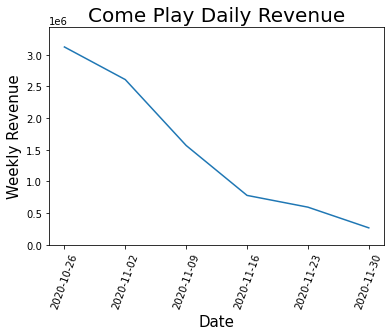

190   2020-11-09
155   2020-11-02
Name: Date, dtype: datetime64[ns]


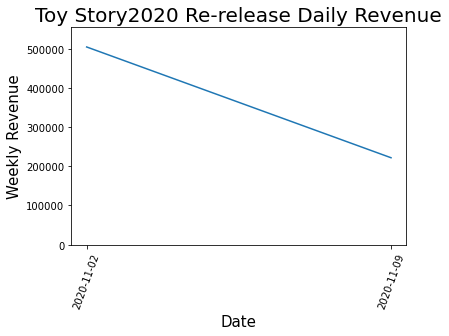

261   2020-11-23
230   2020-11-16
189   2020-11-09
161   2020-11-02
Name: Date, dtype: datetime64[ns]


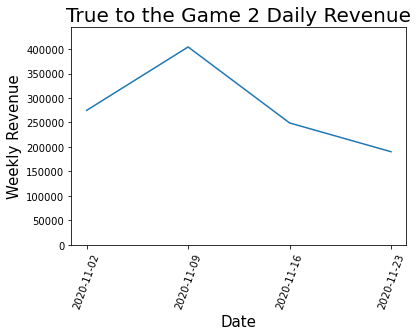

257   2020-11-23
250   2020-11-16
191   2020-11-09
162   2020-11-02
Name: Date, dtype: datetime64[ns]


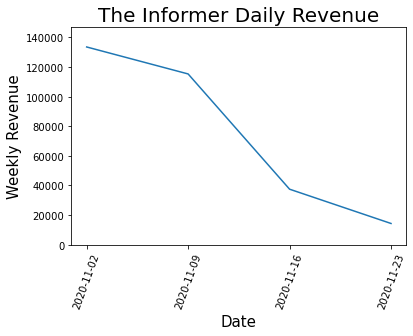

219   2020-11-09
185   2020-11-02
Name: Date, dtype: datetime64[ns]


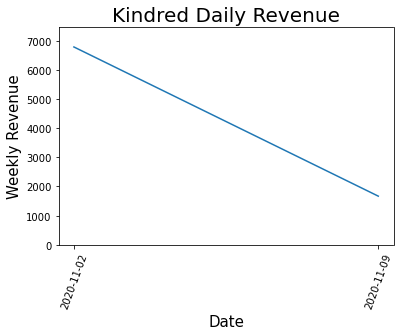

309   2020-11-30
276   2020-11-23
248   2020-11-16
214   2020-11-09
186   2020-11-02
Name: Date, dtype: datetime64[ns]


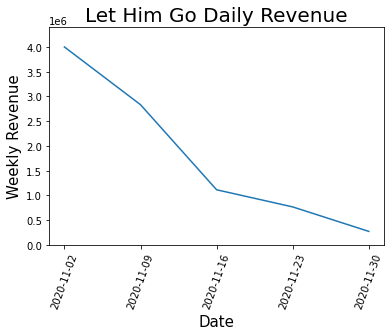

281   2020-11-23
241   2020-11-16
202   2020-11-09
Name: Date, dtype: datetime64[ns]


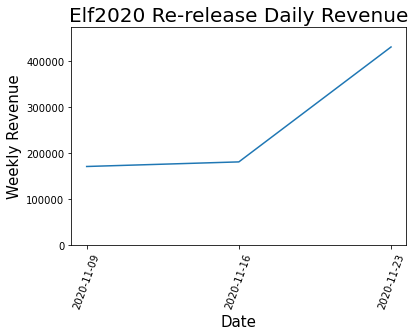

303   2020-11-30
284   2020-11-23
226   2020-11-16
205   2020-11-09
Name: Date, dtype: datetime64[ns]


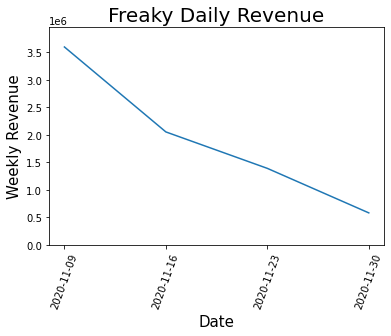

304   2020-11-30
255   2020-11-23
233   2020-11-16
209   2020-11-09
Name: Date, dtype: datetime64[ns]


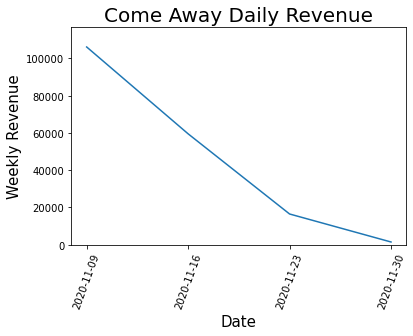

229   2020-11-16
211   2020-11-09
Name: Date, dtype: datetime64[ns]


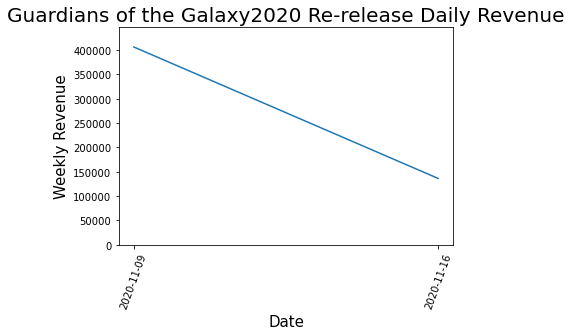

273   2020-11-23
235   2020-11-16
213   2020-11-09
Name: Date, dtype: datetime64[ns]


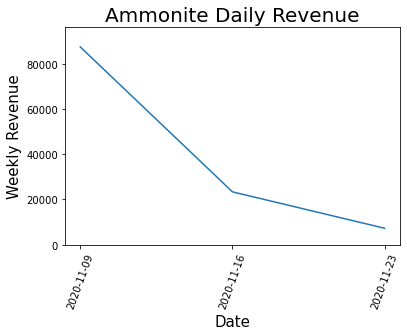

308   2020-11-30
277   2020-11-23
223   2020-11-16
Name: Date, dtype: datetime64[ns]


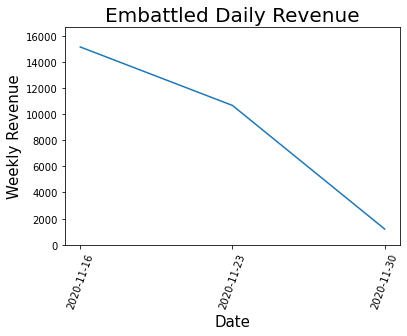

224   2020-11-16
Name: Date, dtype: datetime64[ns]


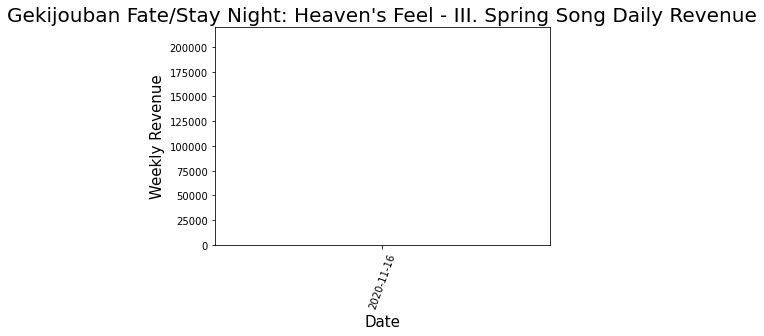

285   2020-11-23
228   2020-11-16
Name: Date, dtype: datetime64[ns]


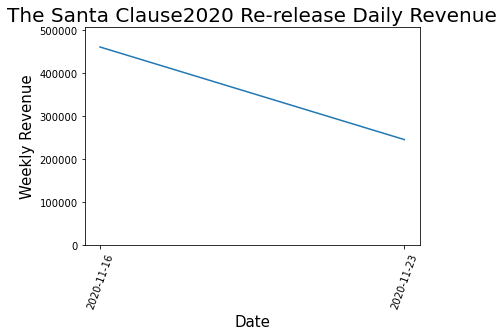

301   2020-11-30
262   2020-11-23
234   2020-11-16
Name: Date, dtype: datetime64[ns]


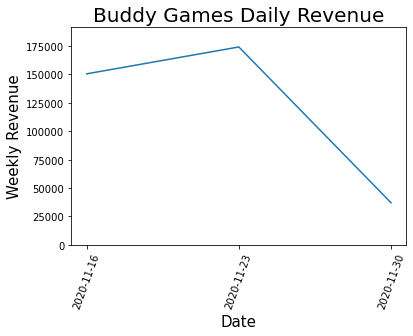

296   2020-11-30
266   2020-11-23
236   2020-11-16
Name: Date, dtype: datetime64[ns]


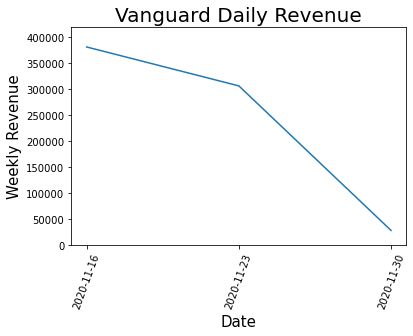

299   2020-11-30
275   2020-11-23
245   2020-11-16
Name: Date, dtype: datetime64[ns]


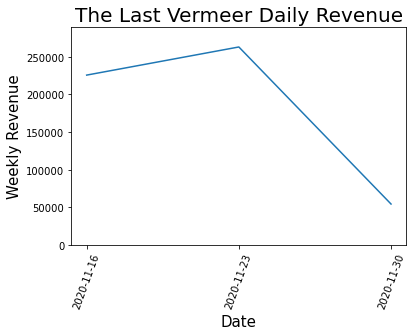

297   2020-11-30
265   2020-11-23
247   2020-11-16
Name: Date, dtype: datetime64[ns]


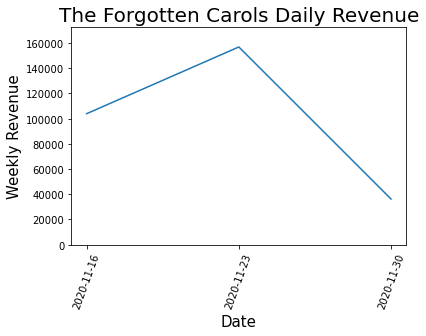

305   2020-11-30
260   2020-11-23
Name: Date, dtype: datetime64[ns]


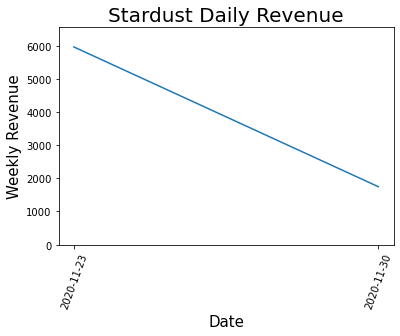

302   2020-11-30
263   2020-11-23
Name: Date, dtype: datetime64[ns]


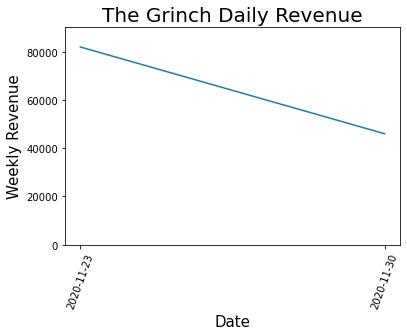

264   2020-11-23
Name: Date, dtype: datetime64[ns]


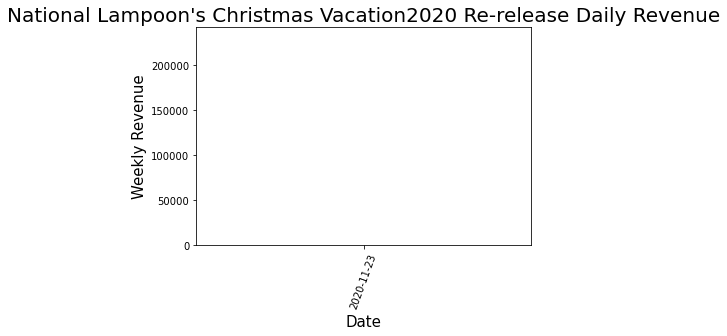

272   2020-11-23
Name: Date, dtype: datetime64[ns]


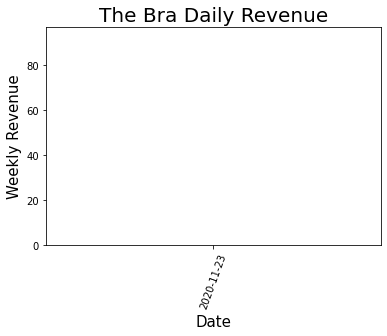

294   2020-11-30
274   2020-11-23
Name: Date, dtype: datetime64[ns]


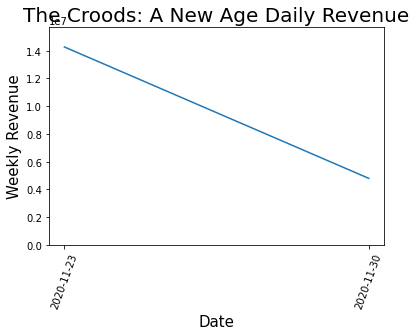

279   2020-11-23
Name: Date, dtype: datetime64[ns]


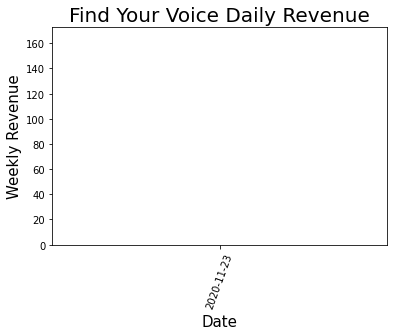

280   2020-11-23
Name: Date, dtype: datetime64[ns]


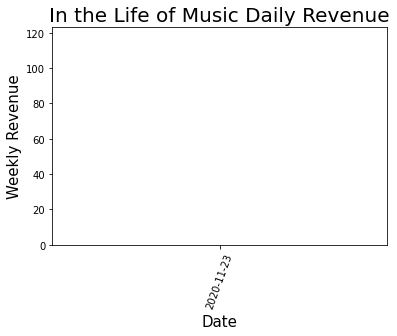

289   2020-11-30
286   2020-11-23
Name: Date, dtype: datetime64[ns]


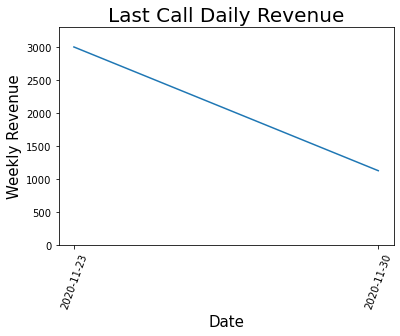

287   2020-11-23
Name: Date, dtype: datetime64[ns]


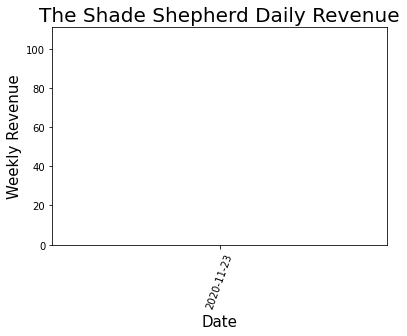

300   2020-11-30
288   2020-11-23
Name: Date, dtype: datetime64[ns]


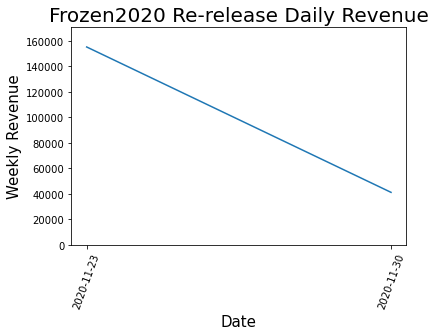

291   2020-11-30
Name: Date, dtype: datetime64[ns]


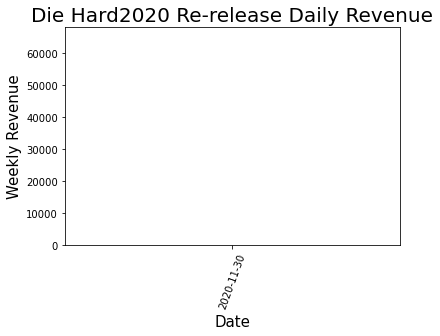

295   2020-11-30
Name: Date, dtype: datetime64[ns]


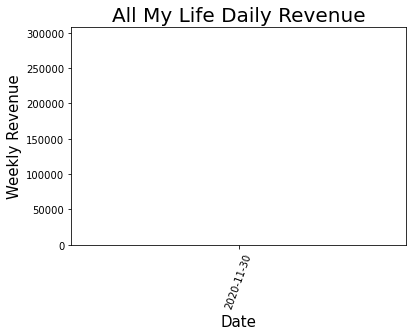

298   2020-11-30
Name: Date, dtype: datetime64[ns]


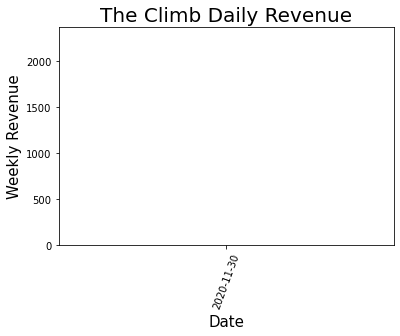

310   2020-11-30
Name: Date, dtype: datetime64[ns]


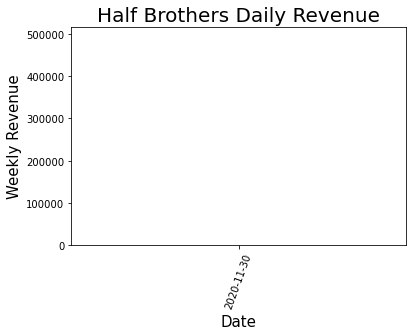

In [46]:
#for movie in df_weekly[(df_weekly['Date'] > '11/20/2020') & (df_weekly['Weekly'] > 1e5)]['Release'].unique():
for movie in df_weekly['Release'].unique():
    dates = df_weekly[df_weekly['Release'] == movie]['Date'][::-1]
    print(dates)
    weekly_gross = df_weekly[df_weekly['Release'] == movie]['Weekly'][::-1]
    date = list(df_weekly[df_weekly['Release'] == movie]['Date'][-1:])[0]
    pred_dates = [date + timedelta(days=7) for date in dates]
    #data = linreg.predict(df_weekly[df_weekly['Release'] == 'The War with Grandpa'].drop(['Date', 'Release', 'Y', 'Week + 1'],axis=1))
    #data = data.drop(['Date', 'Release', 'Y', 'Week + 1'],axis=1)
    #pred = linreg.predict(np.reshape(data))[::-1]
    
    #pred = linreg.predict(df_weekly[df_weekly['Release'] == movie].drop(['Date', 'Release', 'Y', 'Week + 1'],axis=1))
    #print(pred)
    plt.plot(dates, weekly_gross)
    plt.ylim(0,np.max(1.1*weekly_gross))
    #plt.scatter(pred_dates, pred[::-1], c='r')
    plt.xticks(dates, rotation = 70)
    plt.xlabel('Date', fontsize=15)
    plt.ylabel('Weekly Revenue', fontsize= 15)
    plt.title(f'{movie} Daily Revenue', fontsize=20)
    plt.show()
    #plt.plot(df_weekly[df_weekly['Release'] == movie]['Date'][::-1], df_weekly[df_weekly['Release'] == movie]['google trends'][::-1], color='r')
    #plt.xticks(rotation = 70)
    #plt.xlabel('Date', fontsize=15)
    #plt.ylabel('Weekly Searches', fontsize= 15)
    #plt.title(f'{movie} Daily Searches', fontsize=20)
    #plt.show()

In [64]:
df_weekly['Weekly'].max()

14274455.0

intercept: 217425.0654205607
theta: [-2.37238522e+03 -2.98988423e+00  1.01204059e+03 -2.10405296e+04
 -4.81418295e+03  6.53333004e+04 -6.66406999e+04  6.26357691e+05
 -2.98988423e+00  1.01204059e+03 -5.20855784e+04 -2.03392300e+03
  1.23518156e+04]
Alpha -5
train RMSE: 121151.65839258961
train R2 0.958631799240963
test RMSE: 235380.60232222715
test R2 0.7510936647202204


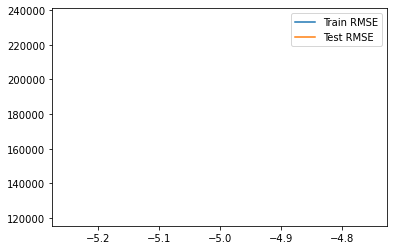

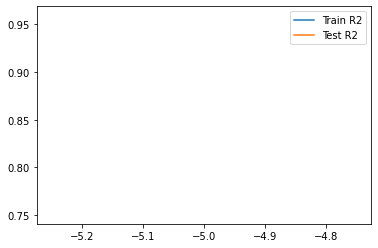

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from matplotlib import pyplot as plt

df_weekly = df_weekly[df_weekly.Weekly != 0]

train = df_weekly[df_weekly['Date'] <= '2020-10-15']
train = train.drop(['Date', 'Release', 'Y'],axis=1)
y_train = train['Week + 1']
X_train = train.drop('Week + 1', axis = 1)

test = df_weekly[df_weekly['Date'] > '2020-10-15']
test = test.drop(['Date', 'Release', 'Y'],axis=1)
y_test = test['Week + 1']
X_test = test.drop('Week + 1', axis=1)

        
scaler = StandardScaler()
train_t = scaler.fit_transform(X_train)
val_t = scaler.transform(X_test)

X_train = pd.DataFrame(train_t)
X_test = pd.DataFrame(val_t)


train_rmse_list = []
train_r2_list = []
test_rmse_list = []
test_r2_list = []

alphas = [-5] #[2**k for k in range(-10,10)]
for alpha in alphas:
    linreg = Ridge(alpha = alpha, fit_intercept=True)
    linreg.fit(X_train, y_train)
    print('intercept:',linreg.intercept_)
    print('theta:',linreg.coef_)
        
    mean = np.mean(y_train)

    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)

    train_rmse = mean_squared_error(y_train, y_train_pred,squared = False)
    train_r2 = r2_score(y_train,y_train_pred)

    test_rmse = mean_squared_error(y_test, y_test_pred, squared = False)
    test_r2 = r2_score(y_test, y_test_pred)

    print('Alpha', alpha)
    print('train RMSE:',(train_rmse))
    print('train R2', train_r2)
    print('test RMSE:',(test_rmse))
    print('test R2', test_r2)
    train_rmse_list.append(train_rmse)

    train_r2_list.append(train_r2)
    test_rmse_list.append(test_rmse)
    test_r2_list.append(test_r2)
plt.plot(alphas, train_rmse_list, label='Train RMSE')
plt.plot(alphas, test_rmse_list, label='Test RMSE')
plt.legend()
plt.show()
plt.plot(alphas, train_r2_list, label='Train R2')
plt.plot(alphas, test_r2_list, label='Test R2')
plt.legend()
plt.show()

In [39]:
df_weekly

,Release,Date,Unnamed: 0,%+-YD,%+-LW,Days,google trends,Avg TD,Avg YD,Weekly,Weekly %+-YD,Weekly %+-LW,Avg Theatre,Avg per Theatre Avg,Avg To Date,Y,Week + 1
436,The Trip to Greece,2020-05-18,8153,-38.5,0.0,6.0,1.230000,1.142857,0.714286,1110.0,-38.5,0.0,1.285714,52.714286,344.285714,2020-05-25,513.0
457,The Wretched,2020-05-18,13595,378.3,472.3,110.0,2.380000,0.714286,0.714286,246813.0,378.3,472.3,31.285714,730.857143,319966.714286,2020-05-25,254014.0
140,How to Build a Girl,2020-05-18,13601,-127.1,-32.3,75.0,0.490000,1.571429,1.571429,8929.0,-127.1,-32.3,3.857143,177.857143,48072.000000,2020-05-25,332.0
100,First Lady,2020-05-18,2724,0.0,35.7,98.0,0.952381,0.428571,0.000000,19.0,0.0,35.7,0.142857,2.714286,13328.285714,2020-05-25,0.0
141,How to Build a Girl,2020-05-25,18891,93.0,-659.8,147.0,0.520000,3.428571,3.142857,332.0,93.0,-659.8,3.000000,15.285714,68852.428571,2020-06-01,374.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Elf2020 Re-release,2020-11-16,103,22.5,33.0,27.0,0.000000,4.428571,3.142857,180000.0,22.5,33.0,111.000000,99.142857,125814.857143,2020-11-23,0.0
89,Counter Column,2020-11-16,504,-100.0,-240.5,134.0,0.018782,11.714286,12.857143,25.0,-100.0,-240.5,0.571429,3.571429,8863.000000,2020-11-23,0.0
506,Vanguard,2020-11-16,93,-15.5,0.0,6.0,19.463341,3.000000,2.000000,380428.0,-15.5,0.0,589.285714,39.285714,112981.285714,2020-11-23,0.0
366,The Informer,2020-11-16,591,-58.2,-457.5,98.0,2.263158,13.857143,13.428571,37442.0,-58.2,-457.5,123.000000,53.714286,270363.714286,2020-11-23,0.0


In [68]:
pd.read_csv('3_mo_weekly.csv', sep='\t')

,Release,Date,%+-YD,%+-LW,Days,google trends,Avg TD,Avg YD,Weekly,Weekly %+-YD,Weekly %+-LW,Avg Theatre,Avg per Theatre Avg,Avg To Date,Y,Week + 1
0,Tesla,2020-08-24,-39.4,-185.8,49.0,425.170068,7.857143,7.428571,34098.0,-39.4,-185.8,99.000000,49.571429,6.085743e+04,2020-08-31,4732.0
1,Bill & Ted Face the Music,2020-08-24,-46.5,0.0,6.0,1.860000,1.285714,0.857143,1125007.0,-46.5,0.0,431.571429,159.428571,3.494943e+05,2020-08-31,1142565.0
2,Unhinged,2020-08-24,121.7,-106.2,98.0,22.619048,1.428571,1.285714,3819220.0,121.7,-106.2,2040.714286,254.142857,6.757881e+06,2020-08-31,2598055.0
3,Juvenile Delinquents,2020-08-24,0.0,0.0,354.0,0.000000,3.714286,0.000000,1260.0,0.0,0.0,0.285714,180.000000,9.700571e+03,2020-08-31,0.0
4,Words on Bathroom Walls,2020-08-24,159.3,9.3,49.0,4.040000,3.857143,3.571429,646438.0,159.3,9.3,1125.857143,75.857143,7.227500e+05,2020-08-31,455438.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,Frozen2020 Re-release,2020-11-23,136.1,0.0,15.0,0.000000,9.142857,7.285714,155000.0,136.1,0.0,976.428571,15.714286,6.000000e+04,2020-11-30,0.0
399,Freaky,2020-11-23,18.1,-191.4,98.0,20.597128,1.714286,1.571429,1389310.0,18.1,-191.4,1919.000000,106.285714,6.347896e+06,2020-11-30,0.0
400,In the Life of Music,2020-11-23,0.0,0.0,104.0,0.042432,3.714286,0.000000,112.0,0.0,0.0,0.142857,16.000000,8.830000e+02,2020-11-30,0.0
401,Vanguard,2020-11-23,0.5,-174.3,49.0,48.941799,8.571429,8.142857,301009.0,0.5,-174.3,973.142857,44.571429,5.389874e+05,2020-11-30,0.0
